In [53]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

``` Simple Linear Regression Using Gradient Descent
the relationship between student test scores and hours of study
Intuitively, there must be a relationship right? The more you study, the better your test scores ```

In [54]:
#data = pd.read_excel('flightcosts.xlsx') 


In [55]:
data = np.genfromtxt("../linear_regression_live-master/data.csv", delimiter=",")

In [56]:
data.shape

(100, 2)

In [57]:
data[0:10] #select the first nine rows


array([[32.50234527, 31.70700585],
       [53.42680403, 68.77759598],
       [61.53035803, 62.5623823 ],
       [47.47563963, 71.54663223],
       [59.81320787, 87.23092513],
       [55.14218841, 78.21151827],
       [52.21179669, 79.64197305],
       [39.29956669, 59.17148932],
       [48.10504169, 75.3312423 ],
       [52.55001444, 71.30087989]])

In [58]:
#split dataset into training set(20 percent) and test set (80 percent)
#
X_train = data[:,0]
y_train = data[:,1]


In [66]:
[X_train.shape,y_train.shape]

[(100,), (100,)]

In [67]:
#arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [68]:
X_train[0:10]

array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
       55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444])

In [69]:
y_train[0:10]

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989])

In [70]:
#linear hypothesis where m is slope,b is intercept and x is independent variable
def hypothesis(m,b,x):
    y = m*x + b
    return y


In [73]:
#picking a random model value m = 2.83, b = 1.4
z = hypothesis(2.83,1.4,X_train)

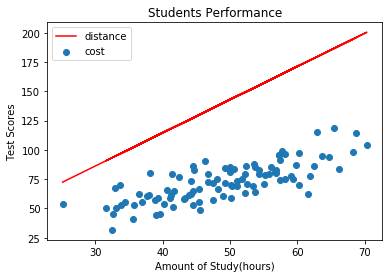

In [74]:

def makeplot(x,y,z):
    plt.scatter(x,y)
    plt.plot(x,z, color='r')
    plt.legend(['distance', 'cost'])
    plt.title('Students Performance')
    plt.xlabel('Amount of Study(hours)')
    plt.ylabel('Test Scores')
    plt.show()


makeplot(X_train,y_train,z)

In [51]:
#data_train =  np.c_[x_train,y_train]

In [75]:
#Compute Cost or Mean Squared Error 
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [76]:
#hypothesis 

In [78]:

#to calculate gradient descent of a given line

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [79]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

In [80]:
#main method<>

learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, data)))
print("Running...")
[b, m] = gradient_descent_runner(data_train, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, data)))

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.06204283002622393, m = 1.4593027999610804, error = 113.52704814897353


In [84]:
z = hypothesis( 1.390043942673587,0.01983309670475249,X_train)

# Comparing Linear Regression With Sklearn And Gradient Descent

In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
r =regressor.fit(X_train.reshape(-1,1),y_train)
[r.intercept_,r.coef_]
ypred = regressor.predict(X_train.reshape(-1,1))

In [98]:
print(" b = {0}, m = {1}, error = {2}".format( r.intercept_, r.coef_, compute_error_for_line_given_points(b, m, data)))

 b = 7.991020982270399, m = [1.32243102], error = [110.25738347]


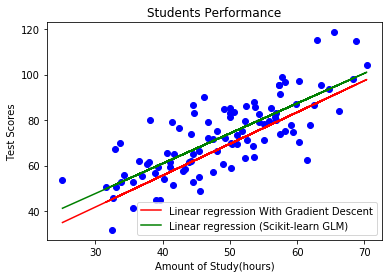

In [93]:
plt.scatter(X_train,y_train,color='blue')
#'Linear regression Gradient descent'
plt.plot(X_train,z, color='r',label='Linear regression With Gradient Descent')

#'Linear regression (Scikit-learn GLM)'
plt.plot(X_train,ypred, color='green', label='Linear regression (Scikit-learn GLM)')
plt.title('Students Performance')
plt.xlabel('Amount of Study(hours)')
plt.ylabel('Test Scores')

plt.legend(loc=4);
plt.show()
